### 캐글 데이터 불러오기

In [564]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sympy import Integral, Symbol

In [603]:
olympic = pd.read_csv("/Users/baekdata/Dev/Project/soprize/olympic medal analysis/athlete_events.csv")
olympic.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [566]:
olympic.groupby('Sport').count().index.str.lower()

Index(['aeronautics', 'alpine skiing', 'alpinism', 'archery',
       'art competitions', 'athletics', 'badminton', 'baseball', 'basketball',
       'basque pelota', 'beach volleyball', 'biathlon', 'bobsleigh', 'boxing',
       'canoeing', 'cricket', 'croquet', 'cross country skiing', 'curling',
       'cycling', 'diving', 'equestrianism', 'fencing', 'figure skating',
       'football', 'freestyle skiing', 'golf', 'gymnastics', 'handball',
       'hockey', 'ice hockey', 'jeu de paume', 'judo', 'lacrosse', 'luge',
       'military ski patrol', 'modern pentathlon', 'motorboating',
       'nordic combined', 'polo', 'racquets', 'rhythmic gymnastics', 'roque',
       'rowing', 'rugby', 'rugby sevens', 'sailing', 'shooting',
       'short track speed skating', 'skeleton', 'ski jumping', 'snowboarding',
       'softball', 'speed skating', 'swimming', 'synchronized swimming',
       'table tennis', 'taekwondo', 'tennis', 'trampolining', 'triathlon',
       'tug-of-war', 'volleyball', 'water pol

### 평창, 리우 데이터 불러오기

In [567]:
def get_more_data(path_dir, file_name):
    
    df = pd.read_csv(path_dir+file_name)
    olympic_more = df[['NOC', 'gold', 'silver', 'bronze', 'Sport']]
    
    olympic_more['Sport'] = olympic_more['Sport'].str.strip() ## 공백 제거 
    olympic_more['Sport'] = olympic_more['Sport'].str.replace('-',' ') ## 공백을 -에서 공백으로 변경 
 
    olympic_more['Score'] = olympic_more['gold']*2 + olympic_more['silver']*1.5 + olympic_more['bronze']*1
    olympic_more = olympic_more[['Sport','NOC','Score']]
    
    
    return olympic_more

path_dir = '/Users/baekdata/Dev/Project/soprize/olympic medal analysis/'

tokyo = get_more_data(path_dir, 'tokyo_2020.csv') 
pyeongchang = get_more_data(path_dir, 'pyeongchang_2018.csv')

In [568]:
tokyo

,Sport,NOC,Score
0,3x3 basketball,LAT,2.0
1,3x3 basketball,USA,2.0
2,3x3 basketball,ROC,3.0
3,3x3 basketball,CHN,1.0
4,3x3 basketball,SRB,1.0
...,...,...,...
494,handball,FRA,4.0
495,handball,DEN,1.5
496,handball,ROC,1.5
497,handball,ESP,1.0


In [569]:
tokyo.groupby('Sport').count().index

Index(['3x3 basketball', 'archery', 'artistic gymnastics', 'artistic swimming',
       'athletics', 'badminton', 'baseball softball', 'basketball',
       'beach volleyball', 'boxing', 'canoe slalom', 'canoe sprint',
       'cycling bmx freestyle', 'cycling bmx racing', 'cycling mountain bike',
       'cycling road', 'cycling track', 'diving', 'equestrian', 'fencing',
       'football', 'golf', 'handball', 'hockey', 'judo', 'karate',
       'marathon swimming', 'modern pentathlon', 'rhythmic gymnastics',
       'rowing', 'rugby sevens', 'sailing', 'shooting', 'skateboarding',
       'sport climbing', 'surfing', 'swimming', 'table tennis', 'taekwondo',
       'tennis', 'trampoline gymnastics', 'triathlon', 'volleyball',
       'water polo', 'weightlifting', 'wrestling'],
      dtype='object', name='Sport')

In [570]:
pyeongchang

,Sport,NOC,Score
0,alpine skiing,AUT,11.0
1,alpine skiing,SUI,10.5
2,alpine skiing,SWE,4.0
3,alpine skiing,NOR,10.0
4,alpine skiing,USA,4.5
...,...,...,...
113,speed skating,BEL,1.5
114,speed skating,CHN,1.0
115,speed skating,ITA,1.0
116,speed skating,OAR,1.0


In [770]:
pyeongchang[pyeongchang["Sport"] == "curling"].sort_values(ascending=False,by="Score").head(22)

,Sport,NOC,Score
32,curling,SWE,3.5
35,curling,SUI,2.5
33,curling,CAN,2.0
34,curling,USA,2.0
36,curling,KOR,1.5
37,curling,JPN,1.0
38,curling,NOR,1.0


In [400]:
pyeongchang.groupby('Sport').count().index

Index(['alpine skiing', 'biathlon', 'bobsleigh', 'cross country skiing',
       'curling', 'figure skating', 'freestyle skiing', 'ice hockey', 'luge',
       'nordic combined', 'short track', 'skeleton', 'ski jumping',
       'snowboard', 'speed skating'],
      dtype='object', name='Sport')

### 캐글 데이터 전처리

In [590]:
olympic_groupby_sport

,Sport,Event,NOC,Medal,Year
0,Alpine Skiing,Alpine Skiing Men's Combined,AUT,Bronze,3
1,Alpine Skiing,Alpine Skiing Men's Combined,AUT,Gold,2
2,Alpine Skiing,Alpine Skiing Men's Combined,AUT,Silver,1
3,Alpine Skiing,Alpine Skiing Men's Combined,CRO,Silver,3
4,Alpine Skiing,Alpine Skiing Men's Combined,ITA,Bronze,1
...,...,...,...,...,...
6385,Wrestling,"Wrestling Women's Middleweight, Freestyle",POL,Bronze,1
6386,Wrestling,"Wrestling Women's Middleweight, Freestyle",RUS,Bronze,1
6387,Wrestling,"Wrestling Women's Middleweight, Freestyle",RUS,Silver,1
6388,Wrestling,"Wrestling Women's Middleweight, Freestyle",USA,Bronze,1


In [608]:
## 
olympic["Medal"] = olympic["Medal"].fillna("no_medal")

## 특정연도 이후 올림픽 종목별 메달 획득 수 
olympic_groupby_sport = olympic[(olympic["Year"] >= 1988)].groupby(["Sport","Event","NOC","Medal"])["Year"].agg("nunique").reset_index()

## 집계
olympic_groupby_sport_cnt = olympic_groupby_sport.groupby(["Sport","NOC","Medal"]).sum().reset_index()

## 피봇 
olympic_groupby_sport_cnt_pivot = olympic_groupby_sport_cnt.pivot(index=["Sport","NOC"],columns="Medal",values="Year").fillna(0).reset_index()

## Score 파생 변수 생성 (동메달 1점, 은메달 1.5점, 금메달 2점)
olympic_groupby_sport_cnt_pivot["Score"] = olympic_groupby_sport_cnt_pivot["Bronze"] * 1 + olympic_groupby_sport_cnt_pivot["Silver"] * 1.5 + olympic_groupby_sport_cnt_pivot["Gold"] * 2

## 소문자 변환
olympic_groupby_sport_cnt_pivot["Sport"] = olympic_groupby_sport_cnt_pivot["Sport"].str.lower()

## 캐글
olympic_kaggle_final = olympic_groupby_sport_cnt_pivot[["Sport","NOC","Score"]]
olympic_kaggle_final

Medal,Sport,NOC,Score
0,alpine skiing,ALB,0.0
1,alpine skiing,ALG,0.0
2,alpine skiing,AND,0.0
3,alpine skiing,ARG,0.0
4,alpine skiing,ARM,0.0
...,...,...,...
3586,wrestling,VEN,0.0
3587,wrestling,VIE,0.0
3588,wrestling,YAR,0.0
3589,wrestling,YEM,0.0


### 캐글 데이터 + 평창, 리우 데이터

In [786]:
olympic_merge1 = pd.merge(olympic_kaggle_final,tokyo, on=["Sport","NOC"],how="outer").fillna(0)
olympic_merge1["Score"] = olympic_merge1["Score_x"] + olympic_merge1["Score_y"]
olympic_merge1 = olympic_merge1[["Sport","NOC","Score"]]

olympic_final = pd.merge(olympic_merge1,pyeongchang,on=["Sport","NOC"],how="outer").fillna(0)
olympic_final["Score"] = olympic_final["Score_x"] + olympic_final["Score_y"]
olympic_final = olympic_final[["Sport","NOC","Score"]]

olympic_final[olympic_final["Sport"]=="curling"].sort_values(by='Score', ascending=False)

,Sport,NOC,Score
1016,curling,CAN,18.5
1030,curling,SWE,11.0
1029,curling,SUI,9.5
1026,curling,NOR,5.5
1021,curling,GBR,4.5
1031,curling,USA,3.0
1018,curling,DEN,1.5
1019,curling,FIN,1.5
1025,curling,KOR,1.5
1017,curling,CHN,1.0


In [774]:
olympic_merge1[olympic_merge1["Sport"]=="curling"].sort_values(by='Score', ascending=False)

,Sport,NOC,Score
1016,curling,CAN,16.5
1030,curling,SWE,7.5
1029,curling,SUI,7.0
1021,curling,GBR,4.5
1026,curling,NOR,4.5
1018,curling,DEN,1.5
1019,curling,FIN,1.5
1017,curling,CHN,1.0
1031,curling,USA,1.0
1020,curling,FRA,0.0


In [776]:
pyeongchang[pyeongchang["Sport"]=="curling"].sort_values(by='Score', ascending=False)

,Sport,NOC,Score
32,curling,SWE,3.5
35,curling,SUI,2.5
33,curling,CAN,2.0
34,curling,USA,2.0
36,curling,KOR,1.5
37,curling,JPN,1.0
38,curling,NOR,1.0


In [771]:
olympic_final[olympic_final["Sport"]=="curling"].sort_values(by='Score', ascending=False)

,Sport,NOC,Score
1016,curling,CAN,16.5
1030,curling,SWE,7.5
1029,curling,SUI,7.0
1021,curling,GBR,4.5
1026,curling,NOR,4.5
1018,curling,DEN,1.5
1019,curling,FIN,1.5
1017,curling,CHN,1.0
1031,curling,USA,1.0
1020,curling,FRA,0.0


### 지니계수 계산

In [612]:
# df[(df['eng']==10) | (df['eng']==50)]

olympic = olympic[olympic['Year']>=2016]
summer_olympic = olympic[(olympic['Season']=='Summer')&(olympic['Year']>=2016)]
winter_olympic = olympic[(olympic['Season']=='Winter')&(olympic['Year']>=2016)]

summer_year = [1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
winter_year = [1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014, 2018]

sports = olympic.groupby('Sport').count().index.str.lower()
summer_sports = summer_olympic.groupby('Sport').count().index.str.lower()
winter_sports = winter_olympic.groupby('Sport').count().index.str.lower()

def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

results = {}

for sport in sports :
    v = olympic_final[olympic_final["Sport"] == sport]["Score"]
    bins, result, gini_val = G(v)
    
#     plt.figure()
#     plt.subplot(2, 1, 1)
#     plt.plot(bins, result, label="observed")
#     plt.plot(bins, bins, '--', label="perfect eq.")
#     plt.xlabel("fraction of nations")
#     plt.ylabel("fraction of medal_points")
#     plt.title("GINI_{sport}: %.4f".format(sport=sport) %(gini_val))
#     plt.legend()
#     plt.subplot(2, 1, 2)
#     plt.hist(v, bins=20)
#     path_dir = './Olympic/img/'
#     plt.savefig(path_dir+'{sport}'.format(sport=sport)+".png", dpi=300)
    
    results[sport] = round(gini_val, 4)
    
df = pd.DataFrame(results, index=['gini'])
df = df.T
df = df.sort_values(by='gini', ascending=False)
df

# sorted_by_value = sorted(results.items(), key=lambda x: x[1], reverse=True)
# print(sorted_by_value)


# v = olympic_groupby_sport[olympic_groupby_sport["Sport"] == "Archery"]["Medal"]
# bins, result, gini_val = G(v)
# plt.figure()
# plt.subplot(2, 1, 1)
# plt.plot(bins, result, label="observed")
# plt.plot(bins, bins, '--', label="perfect eq.")
# plt.xlabel("fraction of nations")
# plt.ylabel("fraction of medal_points")
# plt.title("GINI: %.4f" %(gini_val))
# plt.legend()
# plt.subplot(2, 1, 2)
# plt.hist(v, bins=20)

,gini
table tennis,0.8988
badminton,0.8832
diving,0.8822
synchronized swimming,0.8809
swimming,0.8773
equestrianism,0.8588
fencing,0.8573
cycling,0.8568
archery,0.8538
judo,0.8476


### 최종 코드

#### 도쿄, 평창 포함

In [807]:
#######################
##### 라이브러리 로드 ##### 
#######################

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

from sympy import Integral, Symbol

#######################
### 캐글 기준연도 설정 ####
#######################

start_year = 1988

#######################
### 캐글 데이터 불러오기 ### 
#######################


olympic = pd.read_csv("/Users/baekdata/Dev/Project/soprize/olympic medal analysis/athlete_events.csv")
olympic["Medal"] = olympic["Medal"].fillna("no_medal")
olympic = olympic[(olympic['Year']>=start_year)]

summer_olympic = olympic[(olympic['Season']=='Summer')&(olympic['Year']>=start_year)]
winter_olympic = olympic[(olympic['Season']=='Winter')&(olympic['Year']>=start_year)]

summer_year = [1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
winter_year = [1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014, 2018]

sports = olympic.groupby('Sport').count().index.str.lower()
summer_sports = summer_olympic.groupby('Sport').count().index.str.lower()
winter_sports = winter_olympic.groupby('Sport').count().index.str.lower()

#######################
#### 캐글 데이터 전처리 ### 
#######################


olympic_groupby_sport = olympic.groupby(["Sport","Event","NOC","Medal"])["Year"].agg("nunique").reset_index()
olympic_groupby_sport_cnt = olympic_groupby_sport.groupby(["Sport","NOC","Medal"]).sum().reset_index()
olympic_groupby_sport_cnt_pivot = olympic_groupby_sport_cnt.pivot(index=["Sport","NOC"],columns="Medal",values="Year").fillna(0).reset_index()
olympic_groupby_sport_cnt_pivot["Score"] = olympic_groupby_sport_cnt_pivot["Bronze"] * 1 + olympic_groupby_sport_cnt_pivot["Silver"] * 1.5 + olympic_groupby_sport_cnt_pivot["Gold"] * 2
olympic_groupby_sport_cnt_pivot["Sport"] = olympic_groupby_sport_cnt_pivot["Sport"].str.lower()
olympic_kaggle_final = olympic_groupby_sport_cnt_pivot[["Sport","NOC","Score"]]

#######################
#### 캐글 + 평창, 리우 ### 
#######################

def get_more_data(path_dir, file_name):
    
    df = pd.read_csv(path_dir+file_name)
    olympic_more = df[['NOC', 'gold', 'silver', 'bronze', 'Sport']]
    
    olympic_more['Sport'] = olympic_more['Sport'].str.strip() ## 공백 제거 
    olympic_more['Sport'] = olympic_more['Sport'].str.replace('-',' ') ## 공백을 -에서 공백으로 변경 
 
    olympic_more['Score'] = olympic_more['gold']*2 + olympic_more['silver']*1.5 + olympic_more['bronze']*1
    olympic_more = olympic_more[['Sport','NOC','Score']]
    
    return olympic_more

path_dir = '/Users/baekdata/Dev/Project/soprize/olympic medal analysis/'

tokyo = get_more_data(path_dir, 'tokyo_2020.csv') 
pyeongchang = get_more_data(path_dir, 'pyeongchang_2018.csv')


olympic_merge1 = pd.merge(olympic_kaggle_final,tokyo, on=["Sport","NOC"],how="outer").fillna(0)
olympic_merge1["Score"] = olympic_merge1["Score_x"] + olympic_merge1["Score_y"]
olympic_merge1 = olympic_merge1[["Sport","NOC","Score"]]

olympic_final = pd.merge(olympic_merge1,pyeongchang,on=["Sport","NOC"],how="outer").fillna(0)
olympic_final["Score"] = olympic_final["Score_x"] + olympic_final["Score_y"]
olympic_final = olympic_final[["Sport","NOC","Score"]]


#######################
###### 지니계수 계산 ##### 
#######################


def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

results = {}

for sport in summer_sports :
    v = olympic_final[olympic_final["Sport"] == sport]["Score"]
    bins, result, gini_val = G(v)

    results[sport] = round(gini_val, 4)

print(start_year,'부터','2020년 까지의 지니계수입니다')    
    
df = pd.DataFrame(results, index=['gini'])
df = df.T
df = df.sort_values(by='gini', ascending=False)
df = df.reset_index()
df = df.rename(columns={'index':'sport'})
df['rank'] = df['gini'].rank(method='min', ascending=False)
df.tail(3)


1988 부터 2020년 까지의 지니계수입니다


,sport,gini,rank
33,modern pentathlon,0.7261,34.0
34,water polo,0.6985,35.0
35,rugby sevens,0.6111,36.0


#### 도쿄, 평창 제외

In [674]:
#######################
##### 라이브러리 로드 ##### 
#######################

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

from sympy import Integral, Symbol

#######################
### 캐글 기준연도 설정 ####
#######################

start_year = 1988
end_year = 2016

#######################
### 캐글 데이터 불러오기 ### 
#######################


olympic = pd.read_csv("/Users/baekdata/Dev/Project/soprize/olympic medal analysis/athlete_events.csv")
olympic["Medal"] = olympic["Medal"].fillna("no_medal")
olympic = olympic[(olympic['Year']>=start_year) & (olympic['Year']<=end_year)]

summer_olympic = olympic[(olympic['Season']=='Summer')&(olympic['Year']>=start_year)]
winter_olympic = olympic[(olympic['Season']=='Winter')&(olympic['Year']>=start_year)]

summer_year = [1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
winter_year = [1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014, 2018]

sports = olympic.groupby('Sport').count().index.str.lower()
summer_sports = summer_olympic.groupby('Sport').count().index.str.lower()
winter_sports = winter_olympic.groupby('Sport').count().index.str.lower()

#######################
#### 캐글 데이터 전처리 ### 
#######################


olympic_groupby_sport = olympic.groupby(["Sport","Event","NOC","Medal"])["Year"].agg("nunique").reset_index()
olympic_groupby_sport_cnt = olympic_groupby_sport.groupby(["Sport","NOC","Medal"]).sum().reset_index()
olympic_groupby_sport_cnt_pivot = olympic_groupby_sport_cnt.pivot(index=["Sport","NOC"],columns="Medal",values="Year").fillna(0).reset_index()
olympic_groupby_sport_cnt_pivot["Score"] = olympic_groupby_sport_cnt_pivot["Bronze"] * 1 + olympic_groupby_sport_cnt_pivot["Silver"] * 1.5 + olympic_groupby_sport_cnt_pivot["Gold"] * 2
olympic_groupby_sport_cnt_pivot["Sport"] = olympic_groupby_sport_cnt_pivot["Sport"].str.lower()
olympic_kaggle_final = olympic_groupby_sport_cnt_pivot[["Sport","NOC","Score"]]


olympic_final = olympic_kaggle_final[["Sport","NOC","Score"]]


#######################
###### 지니계수 계산 ##### 
#######################


def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

results = {}

for sport in sports :
    v = olympic_final[olympic_final["Sport"] == sport]["Score"]
    bins, result, gini_val = G(v)

    results[sport] = round(gini_val, 4)

print(start_year,'부터',end_year,'까지의 지니계수 입니다')    
    
df = pd.DataFrame(results, index=['gini'])
df = df.T
df = df.sort_values(by='gini', ascending=False)
df = df.reset_index()
df

1988 부터 2016 까지의 지니계수 입니다


,index,gini
0,table tennis,0.8986
1,badminton,0.8910
2,alpine skiing,0.8840
3,diving,0.8829
4,synchronized swimming,0.8809
5,swimming,0.8783
6,luge,0.8778
7,archery,0.8681
8,cross country skiing,0.8637
9,rhythmic gymnastics,0.8619


### 시각화

(array([87.,  7.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.   ,  3.575,  7.15 , 10.725, 14.3  , 17.875, 21.45 , 25.025,
        28.6  , 32.175, 35.75 , 39.325, 42.9  , 46.475, 50.05 , 53.625,
        57.2  , 60.775, 64.35 , 67.925, 71.5  ]),
 <BarContainer object of 20 artists>)

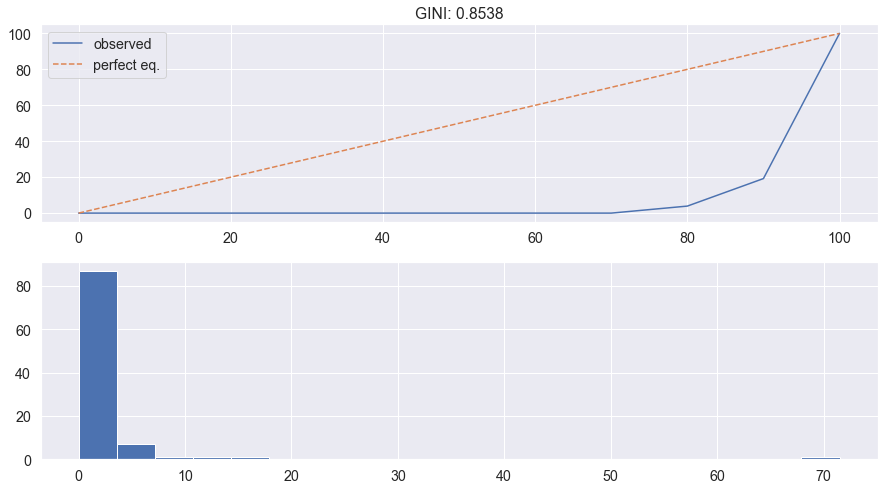

In [822]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = olympic_final[olympic_final["Sport"] == "archery"]["Score"]
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

<AxesSubplot:xlabel='gini', ylabel='sport'>

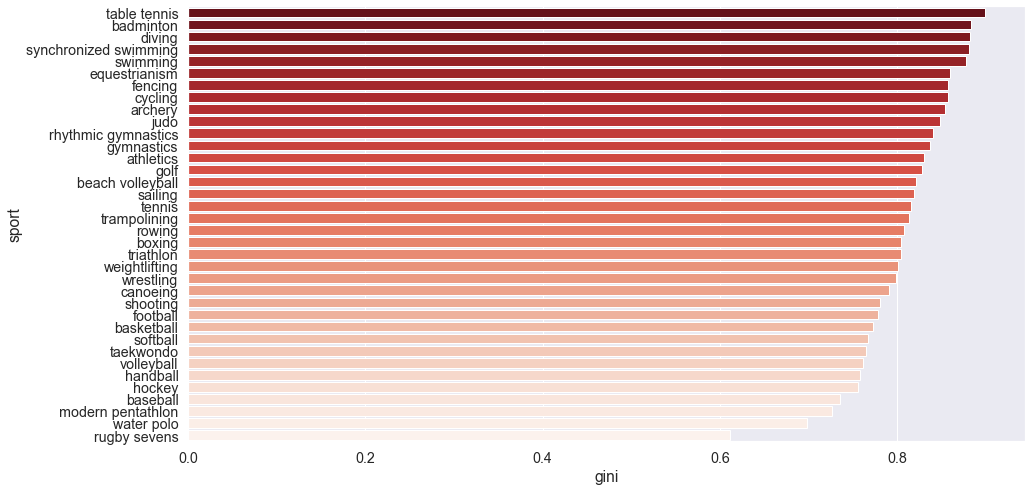

In [819]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.3)

sns.barplot(y="sport", x="gini", data = df, palette="Reds_r")

### 참고 수치

#### 양궁 스코어

In [634]:
olympic_final[olympic_final["Sport"] == "archery"].sort_values(by="Score",ascending=False).head(24)

,Sport,NOC,Score
147,archery,KOR,71.5
191,archery,USA,15.0
112,archery,CHN,11.5
142,archery,ITA,10.5
144,archery,JPN,6.0
189,archery,UKR,5.5
186,archery,TPE,5.0
132,archery,GER,5.0
128,archery,FRA,4.5
100,archery,AUS,4.0


#### 상/하위 종목 국가 확인

In [745]:
olympic_final[olympic_final["Sport"] == "table tennis"].sort_values(ascending=False,by="Score").head(12)

,Sport,NOC,Score
2901,table tennis,CHN,102.0
2938,table tennis,KOR,21.5
2921,table tennis,GER,11.0
2936,table tennis,JPN,10.5
2959,table tennis,PRK,4.5
2973,table tennis,SWE,4.5
2967,table tennis,SGP,3.5
2979,table tennis,TPE,3.5
2924,table tennis,HKG,2.5
2918,table tennis,FRA,2.5


In [717]:
olympic_final[olympic_final["Sport"] == "badminton"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
420,badminton,CHN,72.0
436,badminton,INA,32.0
445,badminton,KOR,29.5
423,badminton,DEN,12.5
447,badminton,MAS,12.0
...,...,...,...
442,badminton,ITA,0.0
443,badminton,JAM,0.0
412,badminton,AUS,0.0
446,badminton,LTU,0.0


In [718]:
olympic_final[olympic_final["Sport"] == "diving"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
1177,diving,CHN,135.5
1229,diving,USA,29.5
1217,diving,RUS,26.0
1165,diving,AUS,16.5
1176,diving,CAN,14.5
...,...,...,...
1195,diving,HKG,0.0
1196,diving,HUN,0.0
1197,diving,INA,0.0
1164,diving,ARM,0.0


In [726]:
print(olympic_final[olympic_final["Sport"] == "modern pentathlon"].sort_values(ascending=False,by="Score").count())
print(olympic_final[olympic_final["Sport"] == "modern pentathlon"].sort_values(ascending=False,by="Score"))

Sport    49
NOC      49
Score    49
dtype: int64
                  Sport  NOC  Score
2018  modern pentathlon  HUN   12.0
2013  modern pentathlon  GBR   12.0
2033  modern pentathlon  RUS    9.5
2026  modern pentathlon  LTU    7.5
2029  modern pentathlon  POL    5.0
2020  modern pentathlon  ITA    4.0
2005  modern pentathlon  CZE    3.0
2010  modern pentathlon  EUN    2.5
2039  modern pentathlon  UKR    2.5
2022  modern pentathlon  KAZ    2.0
1995  modern pentathlon  AUS    2.0
2015  modern pentathlon  GER    2.0
2025  modern pentathlon  LAT    1.5
2011  modern pentathlon  FRA    1.5
2042  modern pentathlon  USA    1.5
2003  modern pentathlon  CHN    1.5
2007  modern pentathlon  EGY    1.5
1997  modern pentathlon  BLR    1.0
1998  modern pentathlon  BRA    1.0
2024  modern pentathlon  KOR    1.0
2027  modern pentathlon  MEX    1.0
2040  modern pentathlon  URS    1.0
2038  modern pentathlon  TUR    0.0
2037  modern pentathlon  TPE    0.0
2036  modern pentathlon  TCH    0.0
2028  modern pe

In [729]:
olympic_final[olympic_final["Sport"] == "water polo"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
3336,water polo,USA,13.0
3322,water polo,ITA,9.0
3321,water polo,HUN,8.0
3314,water polo,ESP,6.5
3331,water polo,SRB,6.0
3311,water polo,CRO,5.0
3329,water polo,RUS,4.5
3307,water polo,AUS,4.0
3320,water polo,GRE,3.0
3330,water polo,SCG,2.5


In [733]:
olympic_final[olympic_final["Sport"] == "rugby sevens"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
2212,rugby sevens,FIJ,5.0
2217,rugby sevens,NZL,5.0
2207,rugby sevens,AUS,2.0
2213,rugby sevens,FRA,1.5
2214,rugby sevens,GBR,1.5
2206,rugby sevens,ARG,1.0
2209,rugby sevens,CAN,1.0
2218,rugby sevens,RSA,1.0
2208,rugby sevens,BRA,0.0
2210,rugby sevens,COL,0.0


In [739]:
olympic_final[olympic_final["Sport"] == "taekwondo"].sort_values(ascending=False,by="Score").head(42)

,Sport,NOC,Score
3045,taekwondo,KOR,35.5
3009,taekwondo,CHN,18.5
3092,taekwondo,USA,14.0
3025,taekwondo,GBR,12.5
3086,taekwondo,TPE,11.5
3089,taekwondo,TUR,11.5
3021,taekwondo,ESP,10.5
3054,taekwondo,MEX,10.0
3023,taekwondo,FRA,9.5
3035,taekwondo,IRI,8.5


In [747]:
olympic_final[olympic_final["Sport"] == "archery"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
147,archery,KOR,71.5
191,archery,USA,15.0
112,archery,CHN,11.5
142,archery,ITA,10.5
144,archery,JPN,6.0
...,...,...,...
141,archery,IRQ,0.0
140,archery,IRL,0.0
139,archery,IRI,0.0
138,archery,IND,0.0


In [765]:
olympic_final[olympic_final["Sport"] == "alpine skiing"].sort_values(ascending=False,by="Score").head(22)

,Sport,NOC,Score
6,alpine skiing,AUT,95.0
79,alpine skiing,SUI,40.0
62,alpine skiing,NOR,38.0
93,alpine skiing,USA,38.0
44,alpine skiing,ITA,31.0
33,alpine skiing,GER,29.5
29,alpine skiing,FRA,23.0
20,alpine skiing,CRO,17.0
81,alpine skiing,SWE,16.0
76,alpine skiing,SLO,10.0


In [797]:
olympic_final[olympic_final["Sport"] == "luge"].sort_values(ascending=False,by="Score").head(22)

,Sport,NOC,Score
1963,luge,GER,60.0
1948,luge,AUT,22.0
1968,luge,ITA,16.0
1961,luge,GDR,10.0
1991,luge,USA,7.5
1972,luge,LAT,4.5
1981,luge,RUS,4.5
1953,luge,CAN,2.5
1959,luge,FRG,2.5
1990,luge,URS,1.0


In [796]:
olympic_final[olympic_final["Sport"] == "cross country skiing"].sort_values(ascending=False,by="Score").head(22)

,Sport,NOC,Score
992,cross country skiing,NOR,106.0
1000,cross country skiing,RUS,52.0
1007,cross country skiing,SWE,51.5
976,cross country skiing,ITA,48.5
962,cross country skiing,FIN,31.5
967,cross country skiing,GER,21.5
1013,cross country skiing,URS,20.5
960,cross country skiing,EUN,13.0
954,cross country skiing,CZE,12.5
958,cross country skiing,EST,12.0


In [801]:
olympic_final[olympic_final["Sport"] == "nordic combined"].sort_values(ascending=False,by="Score").head(22)

,Sport,NOC,Score
2053,nordic combined,GER,21.5
2056,nordic combined,NOR,20.5
2043,nordic combined,AUT,19.0
2049,nordic combined,FIN,11.5
2055,nordic combined,JPN,8.5
2050,nordic combined,FRA,6.5
2065,nordic combined,USA,6.5
2060,nordic combined,SUI,4.5
2051,nordic combined,FRG,2.0
2058,nordic combined,RUS,1.0


In [800]:
olympic_final[olympic_final["Sport"] == "snowboarding"].sort_values(ascending=False,by="Score").head(22)

,Sport,NOC,Score
2597,snowboarding,USA,36.5
2593,snowboarding,SUI,20.0
2577,snowboarding,FRA,14.5
2570,snowboarding,CAN,11.0
2590,snowboarding,RUS,8.0
2579,snowboarding,GER,7.5
2566,snowboarding,AUT,7.5
2587,snowboarding,NOR,5.5
2576,snowboarding,FIN,4.0
2583,snowboarding,JPN,4.0


In [804]:
olympic_final[olympic_final["Sport"] == "curling"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
1016,curling,CAN,18.5
1030,curling,SWE,11.0
1029,curling,SUI,9.5
1026,curling,NOR,5.5
1021,curling,GBR,4.5
1031,curling,USA,3.0
1018,curling,DEN,1.5
1019,curling,FIN,1.5
1025,curling,KOR,1.5
1017,curling,CHN,1.0


In [825]:
olympic_final[olympic_final["Sport"] == "figure skating"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
1433,figure skating,RUS,44.5
1444,figure skating,USA,29.0
1402,figure skating,CAN,25.5
1420,figure skating,JPN,11.5
1403,figure skating,CHN,10.5
1409,figure skating,EUN,8.5
1443,figure skating,URS,8.0
1411,figure skating,FRA,8.0
1416,figure skating,GER,5.0
3755,figure skating,OAR,5.0


In [826]:
olympic_final[olympic_final["Sport"] == "beach volleyball"].sort_values(ascending=False,by="Score")

,Sport,NOC,Score
545,beach volleyball,BRA,19.5
579,beach volleyball,USA,19.0
559,beach volleyball,GER,5.0
542,beach volleyball,AUS,4.5
549,beach volleyball,CHN,2.5
568,beach volleyball,NOR,2.0
576,beach volleyball,SUI,2.0
3646,beach volleyball,ROC,1.5
562,beach volleyball,ITA,1.5
554,beach volleyball,ESP,1.5
